In [1]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: c:\Users\mirlo\workshop3


In [2]:
import pandas as pd 

In [3]:
from Database.conexion_db import create_connection
connection = create_connection()

Attempting to connect to the database...
Connection to MySQL database established successfully.


In [5]:
query = "SELECT * FROM predicciones;"
prediccion = pd.read_sql(query, connection)
prediccion.head()

C:\Users\mirlo\AppData\Local\Temp\ipykernel_11560\2733881483.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  prediccion = pd.read_sql(query, connection)


,country_region,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity,dystopia_residual,Score_original,Prediccion
0,7.0,10.0,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,7.200,7.24124
1,94.0,3.0,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214,7.187,6.93863
2,162.0,5.0,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011,7.119,7.03213
3,19.0,3.0,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001,6.983,6.84649
4,85.0,10.0,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961,6.946,7.06774


In [6]:
y_true = prediccion['Score_original']
y_pred = prediccion['Prediccion']

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


print('Gradient Boosting Regressor Performance Metrics:')

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

Gradient Boosting Regressor Performance Metrics:
MAE: 0.1649059468723222
MSE: 0.0655660403513282
R²: 0.9477478660343518


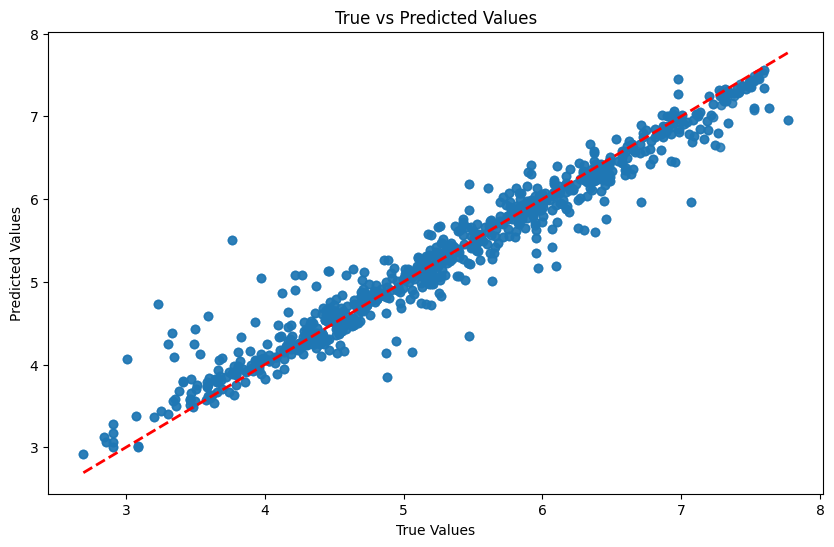

In [8]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

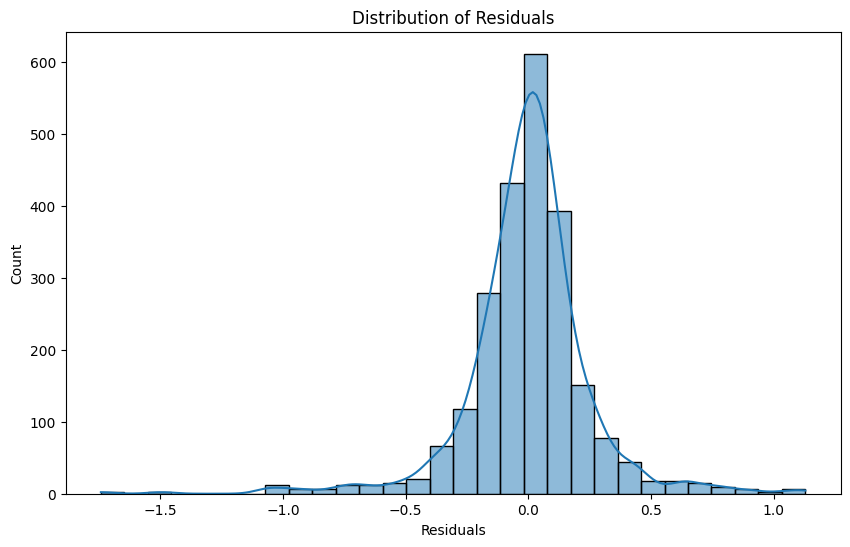

In [9]:
import seaborn as sns


plt.figure(figsize=(10, 6))
residuals = y_true - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()